<a id='top'></a>

# CSCI3022 F20
# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: John Ortiz

***

This assignment is due on Canvas by **MIDNIGHT on Friday September 4**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) |
---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<br>

<a/ id='p1'></a>

### (20 points) Problem 1: Theory (Sampling)
***

<img style="float: left; width: 200px; padding: 3mm;" src="https://upload.wikimedia.org/wikipedia/commons/5/57/Acme_ballot_box_-_Smithsonian.jpg" alt="A ballot box"/>  
You are the head of a news outlet on election day. You have embedded journalists in key U.S. States in order sample voters at different polling stations in the states. Once your journalists choose a polling station, they monitor the station for the election day. The journalists then report back the number of votes for each candidate, which is recorded in a special App on your phone, called Hippocampus. Overall, your team collected data from 6 polling stations in Alaska, 36 polling stations in Ohio, 12 polling stations in Colorado, 6 polling stations in Iowa, and 42 polling stations from California.

You want to get a sense of the average amount of votes for each candidate per polling station, so you use the Hippocampus app to randomly choose 1 polling station in Alaska, 6 polling stations in Ohio, 2 polling stations in Colorado, 1 polling station in Iowa, and 7 polling stations from California.

$$ \quad $$
    
**Part A:** Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest

**The population is the number of votes.
    The sample frame is the hippocampus app with data from "6 polling stations in Alaska, 36 polling stations in Ohio, 12 polling stations in Colorado, 6 polling stations in Iowa, and 42 polling stations from California.".
    The sample is "1 polling station in Alaska, 6 polling stations in Ohio, 2 polling stations in Colorado, 1 polling station in Iowa, and 7 polling stations from California".
    The type of sample is a simple random sample.
    The quantity of interest is "average amount of votes for each candidate per polling station."**
    

**Part B:** You repeat your sampling, again using the Hippocampus app. Now, you order the stations alphabetically by State and choose every 3rd data value. 
    
Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest

**The population is still the number of votes. The sample frame is still the hippocampus app with data from "6 polling stations in Alaska, 36 polling stations in Ohio, 12 polling stations in Colorado, 6 polling stations in Iowa, and 42 polling stations from California.". The sample has changed now we organize the sample frame( the polling stations ) alphabetically and take every third polling station. The type of sample is systematic sample because we organized the sample frame and picked the kth polling station where $k=3$. The quantity of interest has not changed and is still the "average amount of votes for each candidate per polling station."**

[Back to top](#top)

<br>

<a/ id='p2'></a>

### (20 points) Problem 2: Theory and Computation (Means and Medians)
***

A method to investigate the sensitivity of the sample mean and sample median to extreme outliers and changes in the dataset is to replace one or more elements in a given dataset by a number $y$ and investigate the effect when $y$ changes. To illustrate this, consider the following dataset:
 
$$  4.2 \quad 5.1 \quad 5.0 \quad y \quad 3.8 \quad 4.1 \quad 5.5 \quad 1.9 $$




**Part A:** Compute the sample mean and sample median for $y=1.5$. Then compute both quantities again for $y=6$.

In [4]:
x_15 = np.array([4.2,5.1,5.0,1.5,3.8,4.1,5.5,1.9])
x_6= np.array([4.2,5.1,5.0,6,3.8,4.1,5.5,1.9])  #1.9 3.8 4.1  4.2 5.0 5.1 5.5 6.0

def centrality(x,y):
    #mean calc
    sum1= np.sum(x)
    mean= sum1 / x.size
    #median calc
    x_sorted =np.sort(x) #sorted list
    if(x_sorted.size %2 == 0): #needs to handle if size is even
        median_iter_low = x_sorted.size/2 - 1
        median_iter_high = x_sorted.size/2
        median = ((x_sorted[int(median_iter_low)]) + (x_sorted[int(median_iter_high)]))/2
    else: #needs to handle if size is odd
        median_iter = np.floor(x_sorted.size/2)
        median = x_sorted[int(median_iter)]

    print("When y is " + str(y) + ": ")
    print("The mean is: "+ str(mean))
    print("The median is: " + str(median))
    print("")

centrality(x_15, 1.5)
centrality(x_6, 6)

When y is 1.5: 
The mean is: 3.8875
The median is: 4.15

When y is 6: 
The mean is: 4.45
The median is: 4.6



**Part B:** Is there a value for $y$ that would make the mean of the data equal to 6? If so, calculate the value of $y$ that makes the mean equal to 6. If not, clearly explain why not.
    
Is there a value for $y$ that would make the median of the data equal to 6? If so, calculate the values of $y$ that makes the median equal to 6. If not, clearly explain why not.

**Yes there is a value for y that would make the mean of the data equal to 6. This could be done algebraically if we set 6 equal to the formula for mean: $\bar x = (\sum_i^n(x_i))/n$ . So are equation to solve looks like $\bar x * n = (\sum_i^n(x_i))$, where $\bar x= 6$. The code for the calculations is in the next cell.**

In [5]:
arr_excl_y = np.array([4.2,5.1,5.0,3.8,4.1,5.5,1.9]) #sum of all other numbers
arr_size = arr_excl_y.size +1 #total size (including y)
meanTimesSize= 6 *arr_size
y= meanTimesSize - np.sum(arr_excl_y)
print("So y would be: " + str(y))

So y would be: 18.4


**No there would be no value for y that would make the median equal 6. This is mostly impart to how the median does not utilize all the data points. Hence, would not be affected by a single point. Since the mean does use all the data it can be affected by a single observation.**

**Part C**: Compute the sample variance and the sample standard deviation for the original dataset given in part A, with $y=6$.



Before we code this we need to know the two formulas; these formulas are listed as follows:
Sample Variance = $s^2$ = $ \frac{\sum_i^n [(x_i - \bar x)^2 ]} {n-1}$   
Standard Deviation = s = $ \sqrt{\frac{\sum_i^n [(x_i - \bar x)^2 ]} {n-1}}$

In [6]:
#first we need to calculate the mean
#helper function for calc. mean
def calcMean(x):
    #mean calc
    sum1= np.sum(x)
    mean= sum1 / x.size
    return mean
#remember I have already created an array when y=6, so i just have to call it in calc mean helper function
#print(x_6) tested to make sure it works still
xBar = calcMean(x_6)
print("Our mean is: " + str(xBar))
differenceArr = x_6 #temporary copy of orig array

for i in range(0,differenceArr.size): #does the calculation for each x_i
    differenceArr[i]= np.square(differenceArr[i] - xBar)
    #print(np.square(differenceArr[i] - xBar))
print("This is the difference between each x_i and the mean squared: ")
print(differenceArr)   
numerator = np.sum(differenceArr)
denominator = differenceArr.size -1
variance = numerator/denominator
std =  np.sqrt(variance)
print("")
print("The sample variance: " + str(variance))
print("The standard deviation: " + str(std))

Our mean is: 4.45
This is the difference between each x_i and the mean squared: 
[0.0625 0.4225 0.3025 2.4025 0.4225 0.1225 1.1025 6.5025]

The sample variance: 1.6199999999999999
The standard deviation: 1.2727922061357855


**Part D**: Compute the sample median for the following cases: 
- $y=5$ 
- $y=50$ 
- $y=4.36$ 
- $y \to \infty$ 
- $y \to -\infty$

In [7]:
def medianCalc(x,y):
    #median calc
    x_sorted =np.sort(x) #sorted list
    
    if(x_sorted.size %2 == 0): #needs to handle if size is even
        median_iter_low = x_sorted.size/2 - 1
        median_iter_high = x_sorted.size/2
        median = ((x_sorted[int(median_iter_low)]) + (x_sorted[int(median_iter_high)]))/2
    else: #needs to handle if size is odd
        median_iter = np.floor(x_sorted.size/2)
        median = x_sorted[int(median_iter)]
    print("When y is " + str(y) + ": ")
    print("Sorted array: " + str(x_sorted))
    print("The median is: " + str(median))
    print("")
y5 = np.array([4.2,5.1,5.0,5,3.8,4.1,5.5,1.9])
y50= np.array([4.2,5.1,5.0,50,3.8,4.1,5.5,1.9])  
y436 = np.array([4.2,5.1,5.0,4.36,3.8,4.1,5.5,1.9])
yInf= np.array([4.2,5.1,5.0,np.inf,3.8,4.1,5.5,1.9])  
yNinf= np.array([4.2,5.1,5.0,np.NINF,3.8,4.1,5.5,1.9])  
medianCalc(y5,5)
medianCalc(y50,50)
medianCalc(y436,4.36)
medianCalc(yInf,np.inf)
medianCalc(yNinf,np.NINF)

When y is 5: 
Sorted array: [1.9 3.8 4.1 4.2 5.  5.  5.1 5.5]
The median is: 4.6

When y is 50: 
Sorted array: [ 1.9  3.8  4.1  4.2  5.   5.1  5.5 50. ]
The median is: 4.6

When y is 4.36: 
Sorted array: [1.9  3.8  4.1  4.2  4.36 5.   5.1  5.5 ]
The median is: 4.28

When y is inf: 
Sorted array: [1.9 3.8 4.1 4.2 5.  5.1 5.5 inf]
The median is: 4.6

When y is -inf: 
Sorted array: [-inf  1.9  3.8  4.1  4.2  5.   5.1  5.5]
The median is: 4.15



**Part E**: Think about the previous parts, above, and describe in words or mathematical notation the answers to the following two questions:

- By varying $y$, what is the set of all the possible values that the sample mean could take on?
- By varying $y$, what is the set of all the possible values that the sample median could take on? Specifically, for what sets of $y$ values does the median take on its different possible values?

**By varying y the set of all possible values is all rational numbers, because the mean utilizes all the data points. So if y is a large quantity then it will have a big pull on the mean. For the median, y can be effective only if it changes the middle to points. Y could do that by being between (4.2,5) or y could <4.2 which would push the median further left by pushing the two middle indexes down 1. However if y >5 there will be no change because y would have no effect on moving the middle indexes.**


**Part F**: Describe in words or mathematical notation, what happens to the sample standard deviation when $y$ is varied in the following ways: 
 
- $y \to \infty$ 
- $y \to \bar{x}$

**First the equation to standard deviation is: s = $ \sqrt{\frac{\sum_i^n [(x_i - \bar x)^2 ]} {n-1}}$
<br> When $y\to\infty$: <br>
    Now that we have that we can see that when y approaches infinity it means the numerator is also approaching infinity. Hence the fraction will also go to infinity since the denominator is constants. $\frac{\infty}{c} = \infty$ So the standard deviation goes to infinity.
<br>When $y\to \bar x$: <br> 
    We can see that for when $x_i = y$ then when summed to be part of the total for the numerator we would be adding 0. Effectively we are making the point have no effect on standard deviation because if y is the mean then it can not deviate from itself.** 
    

[Back to top](#top)
<a/ id='p6'></a>

## (20 pts) Problem 3: Computation (Scaling)
***
Consider the following 3 data sets:

`A=[0,1,2,3,4,5,6,7,8,9,10,11,12]`

`B=[0,0,0,12,7,18,47,25,0,13,0,35]`

`C` is the random data set generated by using `np.random.exponential(scale=43, size=1000)`

For each data set, perform the following computations in parts A, B, and C:

**Part A:** Compute and print the mean and standard deviation of the data set.

In [8]:
A=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12])
B=np.array([0,0,0,12,7,18,47,25,0,13,0,35])
C= np.random.exponential(scale=43, size=1000)
#backup arrays for part b:



#calcMean is a function i defined in question 2 part c which returns the mean 
meanA = calcMean(A)
meanB = calcMean(B)
meanC = calcMean(C)


def calcStd (x,mean):
    test = x #temporary copy of orig array
    differenceArr = np.array(test)
    for i in range(0,differenceArr.size): #does the calculation for each x_i - mean
        differenceArr[i]= np.square(differenceArr[i] - mean)
    #print("This is the difference between each x_i and the mean squared: ") #used my code from q2 part c to create this function
    #print(differenceArr)   
    numerator = np.sum(differenceArr)
    denominator = differenceArr.size -1
    variance = numerator/denominator
    std =  np.sqrt(variance)
    return std
stdA= calcStd(A,meanA)
stdB= calcStd(B,meanB)
stdC= calcStd(C,meanC)


def printMeanStd(mean, std, name):
    print("For data set " + name + ": ")
    print("The standard deviation is: " + str(std))
    print("The mean is: " + str(mean))
    print("")
printMeanStd(meanA, stdA, "A")
printMeanStd(meanB, stdB, "B")
printMeanStd(meanC, stdC, "C")


#checking answers
#print("Real answer for std: " + str(np.std(A,ddof=1)))
#print("Real answer for mean: " + str(np.mean(A)))


For data set A: 
The standard deviation is: 3.8944404818493075
The mean is: 6.0

For data set B: 
The standard deviation is: 15.635042227462817
The mean is: 13.083333333333334

For data set C: 
The standard deviation is: 41.259209303846525
The mean is: 41.90924442464324



**Part B:** Compute and print  the mean and standard deviation of the new data set formed by subtracting the original mean from each observation.

In [9]:
#from the previous section we will use my helper function from above: calcMean, calcStd, and printMeanStd

def diffArray(x,mean):
    diff_temp = x
    diff= np.array(diff_temp)
    for i in range(0,diff.size): #does the calculation for each x_i - mean
        diff[i]= diff[i] - mean
    return diff
D=diffArray(A,meanA)
E=diffArray(B,meanB)
F=diffArray(C,meanC)
#gets the new mean for new data set
meanD = calcMean(D)
meanE = calcMean(E)
meanF = calcMean(F)
#gets the std for new data set 
stdD= calcStd(D,meanD)
stdE= calcStd(E,meanE)
stdF= calcStd(F,meanF)
#print("This is the new data set after mean subtraction for A: " + str(D) )
printMeanStd(meanD, stdD, "D")
printMeanStd(meanE, stdE, "E")
printMeanStd(meanF, stdF, "F")
print("Where D,E,F are the new data sets formed from subtracting the original mean from each point.")



#checking answers
#print("Real answer for std: " + str(np.std(D,ddof=1)))
#print("Real answer for mean: " + str(np.mean(D)))

For data set D: 
The standard deviation is: 3.8944404818493075
The mean is: 0.0

For data set E: 
The standard deviation is: 15.204664356105273
The mean is: -0.25

For data set F: 
The standard deviation is: 41.259209303846525
The mean is: 2.5579538487363605e-16

Where D,E,F are the new data sets formed from subtracting the original mean from each point.


**Part C:** Compute and print  the mean and standard deviation of the new data set formed by subtracting the original mean from each observation and then dividing by the original standard deviation.

In [10]:
#from the previous section we will use my helper function from above: calcMean, calcStd, and printMeanStd

def subDivisArray(x,mean,std):
    diff_temp = x
    diff= np.array(diff_temp)
    for i in range(0,diff.size): #does the calculation for each x_i - mean
        diff[i]= (diff[i] - mean)/std
    return diff

G=subDivisArray(A,meanA,stdA)
H=subDivisArray(B,meanB,stdB)
I=subDivisArray(C,meanC,stdC)


#gets the new mean for new data set
meanG = calcMean(G)
meanH = calcMean(H)
meanI = calcMean(I)
#gets the std for new data set 
stdG= calcStd(G,meanG)
stdH= calcStd(H,meanH)
stdI= calcStd(I,meanI)
#print("This is the new data set after mean subtraction for A: " + str(D) )
printMeanStd(meanG, stdG, "G")
printMeanStd(meanH, stdH, "H")
printMeanStd(meanI, stdI, "I")
print("Where G,H,I are the new data sets formed from subtracting the original mean from each point and dividing it by the original standard deviation.")



#checking answers
#print("Real answer for std: " + str(np.std(G,ddof=1)))
#print("Real answer for mean: " + str(np.mean(G)))

For data set G: 
The standard deviation is: 0.7071067811865476
The mean is: 0.0

For data set H: 
The standard deviation is: 0.5222329678670935
The mean is: 0.25

For data set I: 
The standard deviation is: 0.9999999999999999
The mean is: 1.4210854715202004e-17

Where G,H,I are the new data sets formed from subtracting the original mean from each point and dividing it by the original standard deviation.


**Part D:** Why might this result matter?

**Well with any standard deviation and mean we will be able to tell if the data is right or left skew or symmetric. This will help us understand are data better and its behavior.**

**Part E:** Looking at each of the 3 data sets, come up with a real-world context where those kind of numbers might make for reasonable observations.

**Dataset A could represent the number of points each player on the basketball team had. Dataset B in a real world context could be the amount of time spent on a quiz. Any zero marked would mean that person was absent. Dataset C could come from a big online retailer that is measuring percentage of how many orders a customer makes divided by the amount of advertisements seen by them. This can explain such a wide range of points.**

[Back to top](#top)
<a/ id='p4'></a>

## (35 pts) Problem 4: Data (monthly patterns)
***

NOAA's Physical Sciences division (https://www.esrl.noaa.gov/psd) houses an enormous amount of weather data.  Load `BoulderPrecip.csv` from the course page for the last 120 years of monthly precipitation data from Boulder.  Let's take a look!

In [11]:
dfPrecip = pd.read_csv('../Data/BoulderPrecip.csv')
dfPrecip.head()


,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.4,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.3,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,Tr,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.6,1.06,0.08,0.7,17.78


**Part A:** SCRUBBING!  Our data set is going to be tough to use for a few reasons.

1) When the amount of precipitation was nonzero but too small to be recorded, this data set recorded `tr`.  Replace these with zeroes.

2) 2020 isn't over yet!  We have one row at the bottom that isn't fully complete and NA values have been filled into the months that haven't happened yet.  This can wreak havoc on a lot of our methods!  Drop the 2020 data entirely.

3) You may have some object typing issues relating to columns that contained both "Tr"/"NA" and numeric values.  Ensure that Python is treating all of your data as numeric!

In [12]:
#print(dfPrecip)
dfPrecip.replace({'Tr': 0},inplace=True) #1
dfPrecip.drop({120},inplace=True) #2

#dfPrecip.info()
def fix_Month(val): #based nb03 function with apply
    
    if pd.isnull(val):
        return val 
    num = float(val)
    return(num)
dfPrecip.loc[:,"JAN"] = dfPrecip.loc[:,"JAN"].apply(fix_Month)
dfPrecip.loc[:,"FEB"] = dfPrecip.loc[:,"FEB"].apply(fix_Month)
dfPrecip.loc[:,"MAY"] = dfPrecip.loc[:,"MAY"].apply(fix_Month)
dfPrecip.loc[:,"JUN"] = dfPrecip.loc[:,"JUN"].apply(fix_Month)
dfPrecip.loc[:,"SEP"] = dfPrecip.loc[:,"SEP"].apply(fix_Month)
dfPrecip.loc[:,"OCT"] = dfPrecip.loc[:,"OCT"].apply(fix_Month)
dfPrecip.loc[:,"NOV"] = dfPrecip.loc[:,"NOV"].apply(fix_Month)
dfPrecip.loc[:,"DEC"] = dfPrecip.loc[:,"DEC"].apply(fix_Month)
dfPrecip.loc[:,"YEAR TOTAL"] = dfPrecip.loc[:,"YEAR TOTAL"].apply(fix_Month)
dfPrecip.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 14 columns):
Year          120 non-null int64
JAN           120 non-null float64
FEB           120 non-null float64
MAR           120 non-null float64
APR           120 non-null float64
MAY           120 non-null float64
JUN           120 non-null float64
JUL           120 non-null float64
AUG           120 non-null float64
SEP           120 non-null float64
OCT           120 non-null float64
NOV           120 non-null float64
DEC           120 non-null float64
YEAR TOTAL    120 non-null float64
dtypes: float64(13), int64(1)
memory usage: 14.1 KB


**Part B:** Generate a series of 12 box plots with month as the x axis and precipitation on the y-axis.

Text(0.5, 1.0, 'Precipitation over Time')

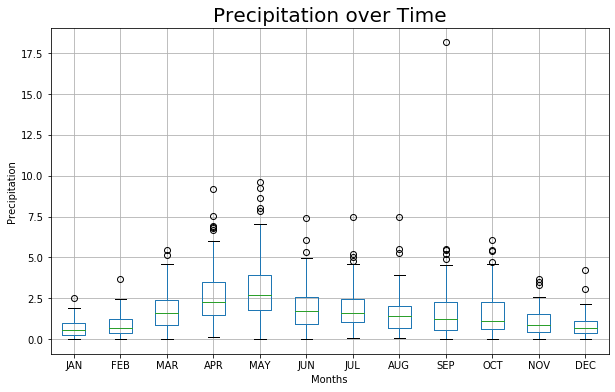

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
bp = dfPrecip.boxplot(column=['JAN', 'FEB', 'MAR','APR','MAY','JUN','JUL','AUG','SEP', 'OCT','NOV','DEC'], ax=ax,);
bp.set_xlabel("Months")
bp.set_ylabel("Precipitation")
plt.title("Precipitation over Time",fontsize=20)


**Part C:** Spring is the wet season in Boulder.   But what is Spring?

Atmospheric scientists love to group months seasonally, breaking the year into a Winter season including December, January, February; a Spring including March, April, and May; and so forth.

The solar year, however, says that Spring runs from near the end of March until near the end of June: let's round at the nearest month and say that it includes the months of April, May and June.

Generate a box plot with precipitation on the y-axis and the two possible monthly 'Spring' groupings (March-May versus April-June) as the x-axis.

Text(0, 0.5, 'Precipitation')

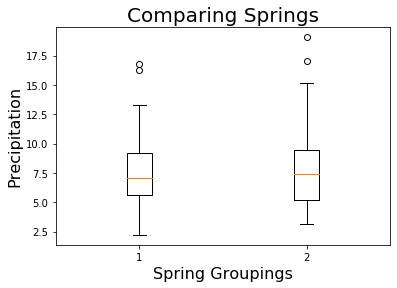

In [14]:
SpringMM = dfPrecip['MAR']+dfPrecip['APR']+dfPrecip['MAY']
SpringAJ = dfPrecip['APR']+dfPrecip['MAY']+dfPrecip['JUN']

plt.boxplot([SpringMM, SpringAJ])
plt.title("Comparing Springs",fontsize=20)
plt.xlabel('Spring Groupings',fontsize=16)
plt.ylabel('Precipitation',fontsize=16)


**Part D:** These might look pretty similar!  Highlight and comment on any differences by calculating the mean, standard deviation, and a Tukey five number summary of each classification of Spring.  Is there a reason here to favor one grouping over the other?

In [15]:
print("This is the Mar-May Spring Grouping:")
print(SpringMM.describe())
print("")
print("This is the APR-JUN Spring Grouping:")
print(SpringAJ.describe())

This is the Mar-May Spring Grouping:
count    120.00000
mean       7.51900
std        2.73733
min        2.21000
25%        5.59750
50%        7.10000
75%        9.17500
max       16.75000
dtype: float64

This is the APR-JUN Spring Grouping:
count    120.000000
mean       7.681917
std        2.939852
min        3.120000
25%        5.222500
50%        7.380000
75%        9.482500
max       19.070000
dtype: float64


**I would most favor the APR-JUN grouping of spring. First I would look at the standard deviation and the lower standard deviation means that the data points are closer together. This of course means that the five numbers will have slightly smaller numbers. Looking at the mean we can see that APR-JUN $\bar x = 7.68 $ verse MAR-MAY $\bar x= 7.51$ that the APR-JUN mean is greater. We can also see theat inner quartile range is higher for APR-JUN, hence this grouping produces slightly more preciptation.** 

**Part E:** Create a density histogram of the September precipitation.  Classify and describe this histogram, including discussion of any skewness, multimodality, or outliers.  Find the data point associated with September, 2013, and recreate your histogram with that value in a different color or otherwise clearly marked.

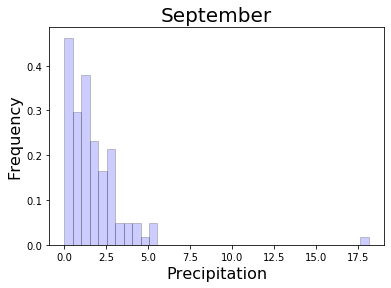

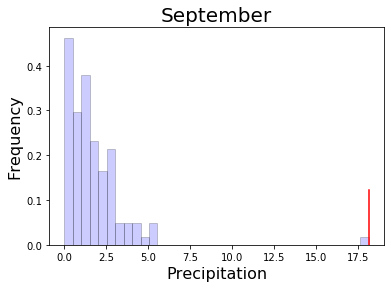

In [27]:
# September code here
sept = dfPrecip.loc[:,"SEP"]
sept2013 = dfPrecip.loc[dfPrecip["Year"]==2013,"SEP"]

def firstHist(sept): 
    plt.hist(sept, color = "blue",alpha=.2, edgecolor = 'black',bins = int(36),rwidth=10,density=True)
    plt.title("September",fontsize=20)
    plt.xlabel('Precipitation',fontsize=16)
    plt.ylabel('Frequency',fontsize=16)

    plt.show()

#fig, ax = plt.subplots(figsize=(10,6)) 

firstHist(sept)
plt.hist(sept, color = "blue",alpha=.2, edgecolor = 'black',bins = int(36),rwidth=10,density=True)
#plt.hist(sept2013, color = "red",bins = int(36),rwidth=10 )
plt.title("September",fontsize=20)
plt.xlabel('Precipitation',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.axvline(x=float(sept2013),color="red",ymax=.25)
plt.show()





**Looking at the final histogram, I can tell that the data is right skewed which means the median is greater than the mean and outliers will be on the right. Hence the point we found September of 2013 is an outlier. Which means when making any further assessments of the data we need to decide would we want to exclude or include that datapoint, and why?**